In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [52]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
pd.factorize(iris_df['species'])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64),
 CategoricalIndex(['setosa', 'versicolor', 'virginica'], categories=['setosa', 'versicolor', 'virginica'], ordered=False, dtype='category'))

In [12]:
len(iris_df)

150

In [15]:
np.random.uniform(0,1,len(iris_df))

array([0.84100799, 0.77416365, 0.16162689, 0.29636892, 0.36487037,
       0.56371948, 0.39738518, 0.37127083, 0.00816906, 0.91851134,
       0.45500571, 0.8086825 , 0.33308557, 0.54689864, 0.42996913,
       0.23805698, 0.70784816, 0.40009422, 0.42168769, 0.85219335,
       0.83883428, 0.20063742, 0.88915392, 0.16582226, 0.48983698,
       0.3317976 , 0.97749368, 0.65643241, 0.90545377, 0.99088632,
       0.1176163 , 0.08678274, 0.68535941, 0.93791286, 0.46479837,
       0.46520876, 0.17076274, 0.25021151, 0.47219633, 0.09305017,
       0.34943277, 0.65400409, 0.02219136, 0.07303228, 0.81108407,
       0.18378524, 0.06333622, 0.89227058, 0.24066393, 0.88280884,
       0.16010261, 0.28830484, 0.38116456, 0.95166075, 0.13625221,
       0.62812186, 0.39626461, 0.55315842, 0.14559707, 0.68089346,
       0.71689939, 0.48365886, 0.8290951 , 0.24310053, 0.75693688,
       0.0194411 , 0.87318325, 0.00442724, 0.92874244, 0.47743615,
       0.54441966, 0.10549924, 0.3063827 , 0.7436278 , 0.07388

In [16]:
iris_df['trainset'] = np.random.uniform(0,1,len(iris_df))<=0.7
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,trainset
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,False


In [18]:
train = iris_df[iris_df['trainset']==True]
test = iris_df[iris_df['trainset']==False]
print("Size of Training Data:"+str(train.shape))
print("Size of Test Data:"+str(test.shape))

Size of Training Data:(115, 6)
Size of Test Data:(35, 6)


In [19]:
features = train.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [22]:
y_train = pd.factorize(train['species'])[0]
# y_train

In [23]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train[features], y_train)

RandomForestClassifier(n_estimators=10)

In [24]:
y_pred = clf.predict(test[features])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [25]:
y_test = pd.factorize(test['species'])[0]

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35



In [53]:
clf.predict_proba(test[features])

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.9, 0.1],
       [0. , 0.7, 0.3],
       [0. , 1. , 0. ],
       [0. , 0.1, 0.9],
       [0. , 0.9, 0.1],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.7, 0.3],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.1, 0.9],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0.1, 0.9]])

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
preds = iris.target_names[clf.predict(test[features])]

In [56]:
test['species']

0          setosa
4          setosa
7          setosa
11         setosa
12         setosa
16         setosa
21         setosa
23         setosa
26         setosa
28         setosa
32         setosa
33         setosa
37         setosa
43         setosa
50     versicolor
53     versicolor
58     versicolor
66     versicolor
68     versicolor
72     versicolor
78     versicolor
83     versicolor
87     versicolor
91     versicolor
92     versicolor
103     virginica
106     virginica
107     virginica
109     virginica
125     virginica
127     virginica
129     virginica
134     virginica
147     virginica
149     virginica
Name: species, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [57]:
for i in range(len(preds)):
    print (preds[i],test.iloc[i,4])

setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
setosa setosa
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
virginica versicolor
versicolor versicolor
versicolor versicolor
versicolor versicolor
virginica virginica
versicolor virginica
virginica virginica
virginica virginica
virginica virginica
virginica virginica
virginica virginica
virginica virginica
virginica virginica
virginica virginica


## Visualizing the Trees

In [59]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=658886357),
 DecisionTreeClassifier(max_features='auto', random_state=769809397),
 DecisionTreeClassifier(max_features='auto', random_state=1625440842),
 DecisionTreeClassifier(max_features='auto', random_state=440893305),
 DecisionTreeClassifier(max_features='auto', random_state=725286794),
 DecisionTreeClassifier(max_features='auto', random_state=1173046998),
 DecisionTreeClassifier(max_features='auto', random_state=959639854),
 DecisionTreeClassifier(max_features='auto', random_state=1247730912),
 DecisionTreeClassifier(max_features='auto', random_state=68945115),
 DecisionTreeClassifier(max_features='auto', random_state=1146851768)]

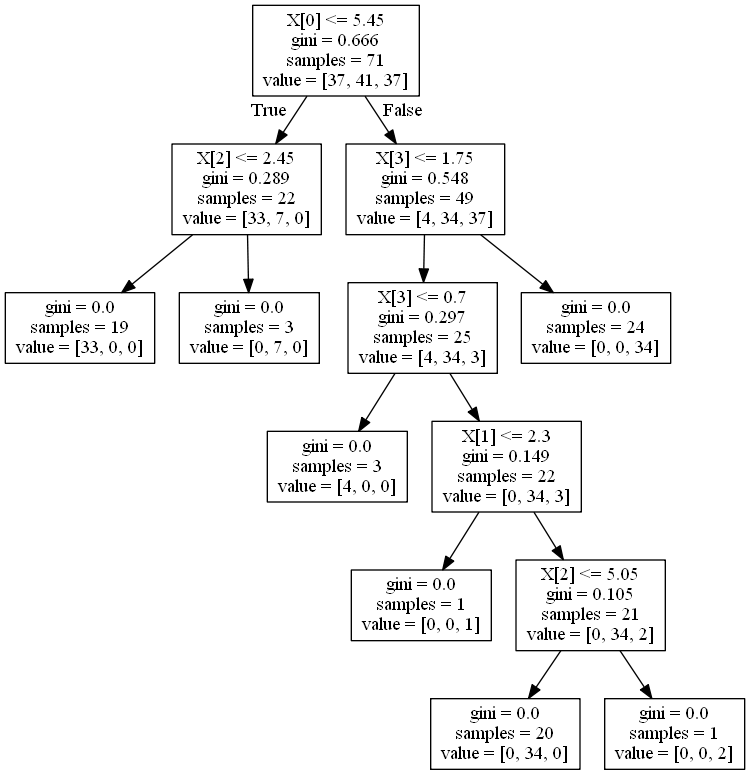

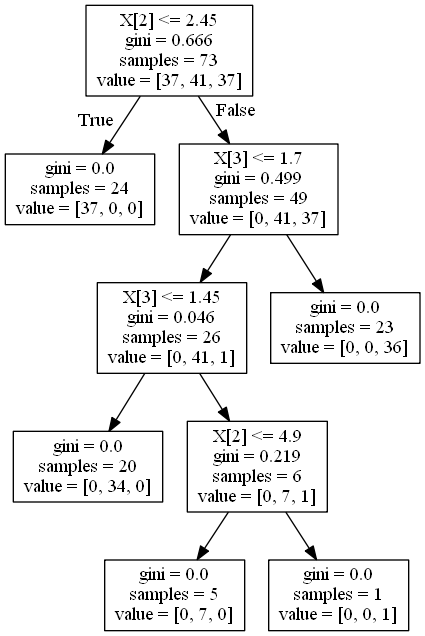

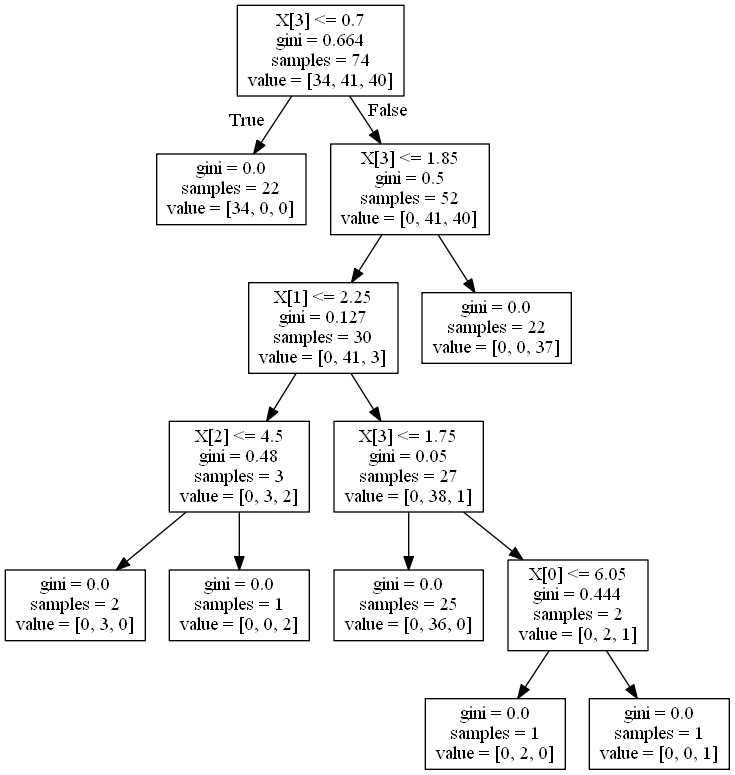

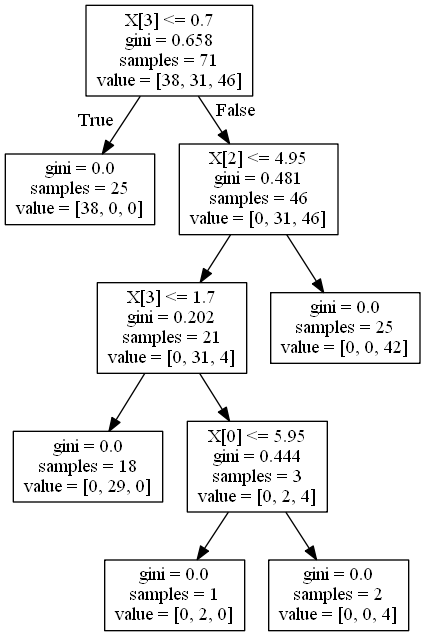

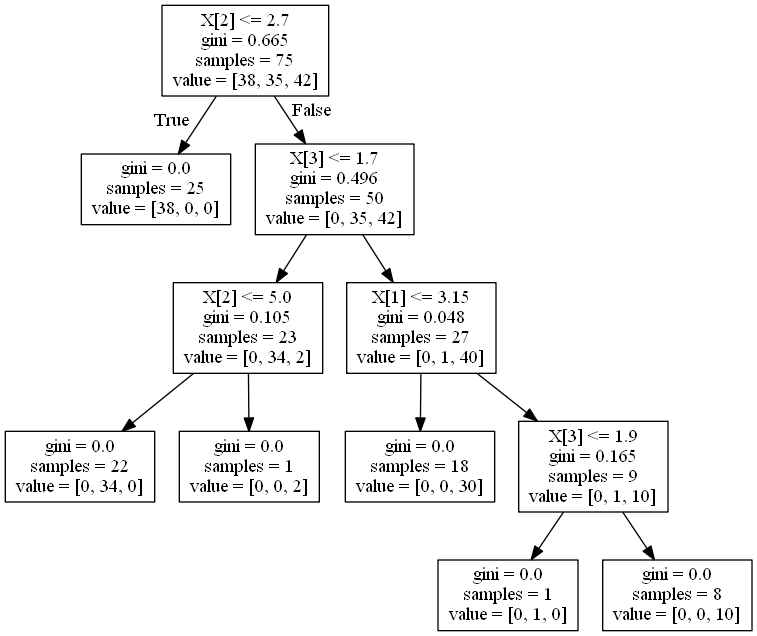

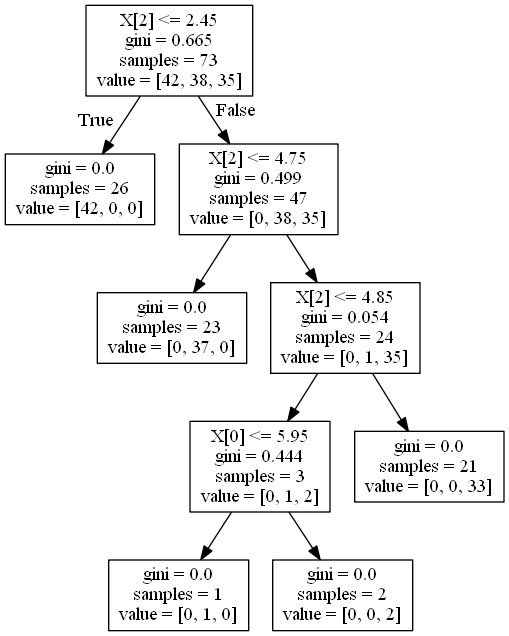

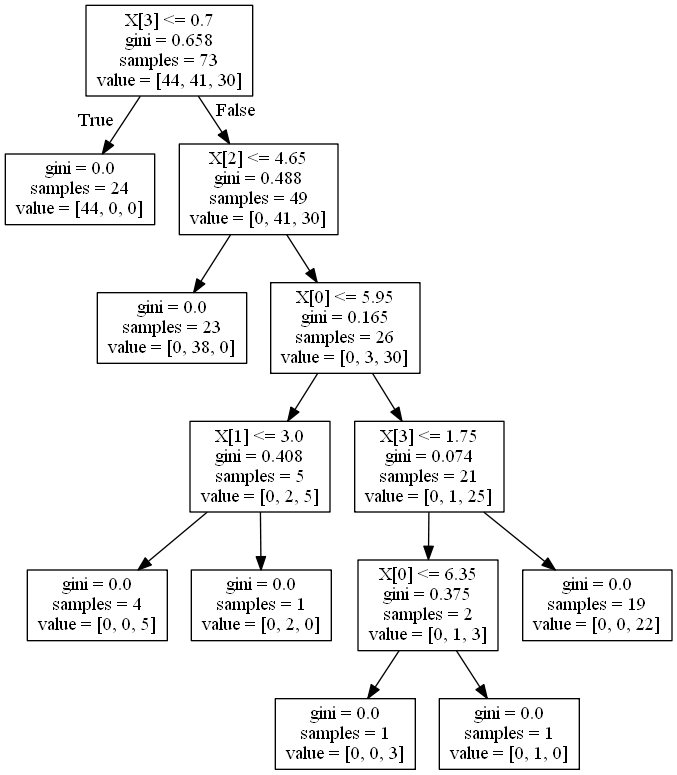

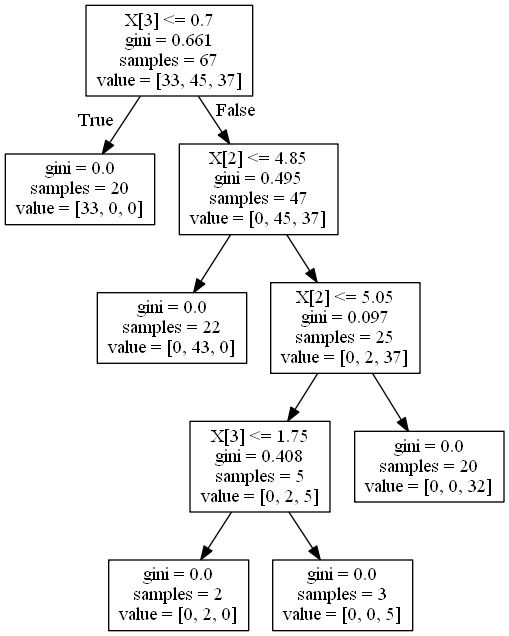

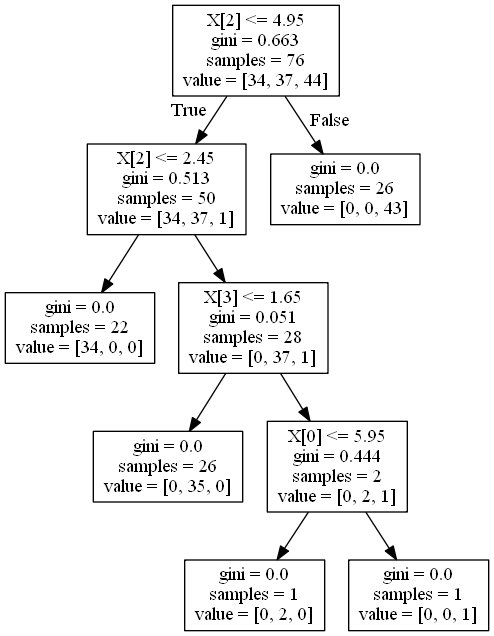

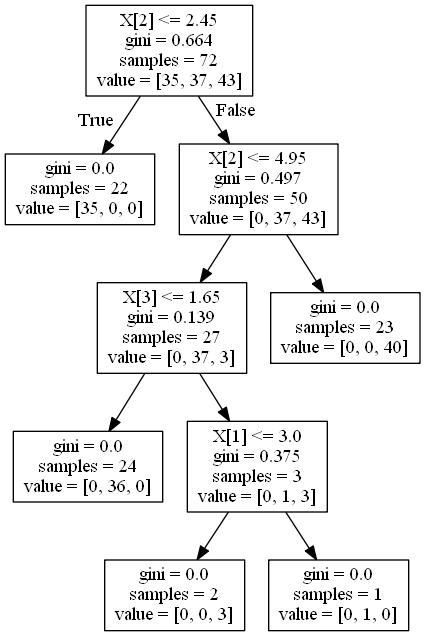

In [62]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

images = []

for i, estimator in enumerate(clf.estimators_):
    dot_data = export_graphviz(estimator)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png('tree'+str(i)+'.png')
    image = Image(graph.create_png())
    display(image)

### Decision Boundary

In [63]:
features[:2]

Index(['sepal length (cm)', 'sepal width (cm)'], dtype='object')

In [64]:
X = iris_df[features[:2]]
x_min, x_max = X.values[:,0].min(),X.values[:,0].max()
y_min, y_max = X.values[:,1].min(),X.values[:,1].max()

In [65]:
xx , yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [66]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(train[features[:2]],y_train)

RandomForestClassifier(n_estimators=10)

In [67]:
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],


Text(0, 0.5, 'sepal width (cm)')

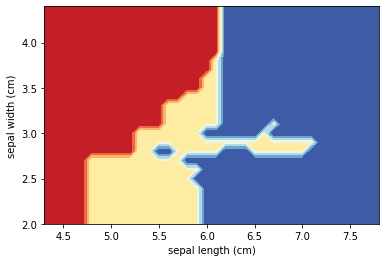

In [68]:
import matplotlib.pyplot as plt
cs = plt.contourf(xx,yy,Z, cmap=plt.cm.RdYlBu)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Hyperparameter Tuning

In [69]:
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [72]:
from sklearn.metrics import f1_score

clf = RandomForestClassifier(n_estimators=1)

clf.fit(train[features],y_train)
y_pred = clf.predict(test[features])
y_test = pd.factorize(test['species'])[0]

f1_score(y_test,y_pred, average='micro')

0.8857142857142857

In [73]:
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators = [int (x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

#number of features to consider at every split
max_features = ['auto', 'sqrt']

#depth of the tree
max_depth = [int(x) for x in np.linspace(10,10,num=11)]

# min no samples for each leaf node
min_samples_leaf = [1,2,4,10]

# min no of samples to split a node
min_samples_split = [2, 5, 10]

random_grid = {'n_estimators':n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf
}

random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10]}

In [74]:
clf = RandomForestClassifier()

clf_randomgrid = RandomizedSearchCV(estimator = clf, param_distributions= random_grid, cv=3, verbose =2)
clf_randomgrid.fit(train[features],y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.4s
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.6s
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   2.1s
[CV] n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=311, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   45.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 10, 10, 10, 10, 10,
                                                      10, 10, 10, 10, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   verbose=2)

In [75]:
clf_randomgrid.best_params_

{'n_estimators': 1577,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [76]:
from sklearn.metrics import f1_score

clf = RandomForestClassifier(n_estimators=1577, min_samples_split = 2, min_samples_leaf = 1, max_features='sqrt',max_depth= 10)

clf.fit(train[features], y_train)
y_pred = clf.predict(test[features])
y_test = pd.factorize(test['species'])[0]

f1_score(y_test, y_pred, average='micro')

0.9428571428571428